## 問題 1

使用「蝦皮_運動內衣_教學用【處理後】留言資料」

1. 針對「留言內容」計算 `feature = ["跑步","健身","瑜珈","舒適","好看","彈性"]` 數量
2. 對顧客留言資料進行分群(5群)，並以折線圖畫出每群關鍵字的得分(注意: 請記得先對留言資料做資料整理, 空值請刪除)

### 資料清理

In [1]:
import pandas as pd

df = pd.read_csv('homework-dataset/蝦皮_運動內衣_教學用【處理後】留言資料.csv')
df.head()

,Unnamed: 0,商品ID,賣家ID,商品名稱,價格,使用者ID,留言時間,訂單編號,給星,留言內容,商品規格
0,0,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,55835694,1579772984,3.250670e+13,5,NaN,"['黑色M', '黑色S']"
1,1,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,15225338,1578451631,3.133020e+13,5,NaN,"['黑色M', '黑色S']"
2,2,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,83903354,1577800151,3.084430e+13,5,NaN,"['綠色S', '深灰色S', '黑色S']"
3,3,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,187180351,1577497981,3.063300e+13,4,NaN,['深灰色M']
4,4,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,40249443,1576938301,2.343023e+09,5,NaN,['黑色XXL']


刪除空白留言內容。

In [2]:
df.dropna(subset=["留言內容"], inplace=True)
df.head()

,Unnamed: 0,商品ID,賣家ID,商品名稱,價格,使用者ID,留言時間,訂單編號,給星,留言內容,商品規格
17,17,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,38727713,1562222280,1.435361e+09,5,♡♡♡♡♡♡^n♡♡♡♡♡♡^n♡♡♡♡♡♡^n♡♡♡♡♡♡^n♡♡♡♡♡♡,"['黑色M', '黑色S']"
26,26,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,201381,1530620152,5.758183e+08,5,超讚的CP值,"['灰色/XL', '黑色/XL']"
27,27,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,201381,1530620152,5.758183e+08,5,超讚的商品品質,"['灰色/XL', '黑色/XL']"
28,28,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,5274439,1529158242,5.540484e+08,5,超讚的商品品質 超讚的商品品質,['黑色/L']
29,29,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,7080442,1528095151,5.523170e+08,5,超讚的出貨速度,['灰色/L']


刪除非數字、英語和中文的留言（如愛心）

In [3]:
import re

invalid_characters = re.compile(r"[^A-Za-z0-9\s\u4e00-\u9fa5]+")
df_cleaned = df.copy()

df_cleaned["留言內容"] = df_cleaned["留言內容"].replace(invalid_characters, "", regex=True)

# 如果留言內容變空白字串，我們要把他清除掉
df_cleaned["留言內容"] = df_cleaned["留言內容"].str.strip()
df_cleaned = df_cleaned[df_cleaned["留言內容"] != ""]

df_cleaned

,Unnamed: 0,商品ID,賣家ID,商品名稱,價格,使用者ID,留言時間,訂單編號,給星,留言內容,商品規格
17,17,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,38727713,1562222280,1.435361e+09,5,nnnn,"['黑色M', '黑色S']"
26,26,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,201381,1530620152,5.758183e+08,5,超讚的CP值,"['灰色/XL', '黑色/XL']"
27,27,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,201381,1530620152,5.758183e+08,5,超讚的商品品質,"['灰色/XL', '黑色/XL']"
28,28,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,5274439,1529158242,5.540484e+08,5,超讚的商品品質 超讚的商品品質,['黑色/L']
29,29,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,7080442,1528095151,5.523170e+08,5,超讚的出貨速度,['灰色/L']
...,...,...,...,...,...,...,...,...,...,...,...
105272,0,4412715638,17483382,Mei ing 運動內衣搭扣美背工字背心透氣無鋼圈運動文胸高度防震聚攏定型瑜伽健身文胸運動背...,284,68219607,1581656456,3.512180e+13,5,暗蝦粉顏色超級好看比照片顏色再亮一些穿起來看起來非常年輕,"['暗蝦粉,S']"
105277,0,3615422268,1446277,❤️Vivy peach❤️特價一周 C罩杯 多彩 律動 背扣式 無鋼圈 運動內衣 馬卡龍 ...,109,13854353,1581498684,3.486420e+13,5,服務負責又積極的賣家出貨快速包裝確實商品優質尺碼剛好謝謝賣家,"['亮藍色,L']"
105281,2,2706339305,60373638,【AresGym】gymshark ark sport bra 運動內衣,600,23053473,1567320613,1.686253e+09,5,顏色很美穿起來有彈性n此款沒胸墊nn胸圍36n我買s號n穿起來還是稍微有空間nn,"['灰紅,S', '卡其,S']"
105296,0,4510576852,198220332,Mollifix 瑪莉菲絲 MoveFree 輕盈微透拼接 運動內衣(皮革黑),1080,12461533,1580798525,3.432720e+13,5,非常推薦他們家的任何商品真的很棒材質款式推薦想買他們的健身商品可放心買cp值高又不貴,['M']


### 特徵分組

In [4]:
# Create a copy of cleaned data for tagging
df_tagged = df_cleaned.copy()

# Define features to analyze in comments
features = ["跑步", "健身", "瑜珈", "舒適", "好看", "彈性"]

# Create binary columns for each feature
for feature in features:
    df_tagged[feature] = df_tagged["留言內容"].str.contains(feature).astype(int)

df_tagged["聲量"] = 1
# Group by user ID and calculate feature counts and total comment volume
df_aggregated_tags = df_tagged.groupby("使用者ID")[[*features, "聲量"]].sum()
df_aggregated_tags


,跑步,健身,瑜珈,舒適,好看,彈性,聲量
使用者ID,,,,,,,
13590,0,0,0,0,0,0,1
14509,0,0,0,0,0,0,1
16710,0,0,0,0,0,0,1
18631,0,0,0,0,0,0,1
22850,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...
221860404,0,0,0,0,0,0,1
222690225,0,0,0,0,0,0,1
225000299,0,0,0,0,0,0,2


### 畫出各個特徵的留言數量

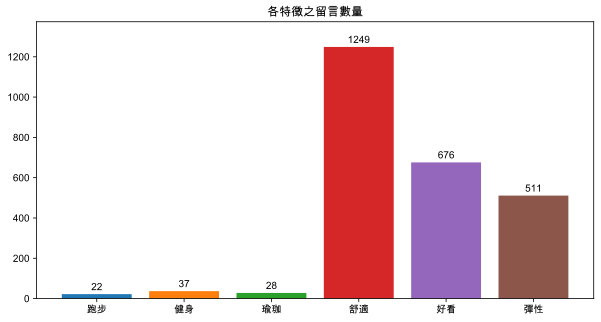

In [5]:
import matplotlib.pyplot as plt
import matplotlib_inline

# Set SVG format for better quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# Set font for a proper Chinese character display
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(10, 5))

ax = plt.subplot()
ax.margins(y=0.1)

for i, feature in enumerate(features):
    count = df_aggregated_tags[feature].sum()

    ax.bar(feature, count)
    ax.text(i, count + 10, count, ha="center", va="bottom")

plt.title("各特徵之留言數量")
plt.show()


### 對顧客留言資料進行分群 (5群)

In [6]:
from sklearn.cluster import KMeans

# 分群的資料不要有「聲量」
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(df_aggregated_tags.drop(["聲量"], axis=1))

kmeans

KMeans(n_clusters=5, random_state=1)

In [7]:
# 分群結果寫回原始資料

df_clustered = df_aggregated_tags.copy()
df_clustered["組別"] = kmeans.labels_.astype(int)
df_clustered

,跑步,健身,瑜珈,舒適,好看,彈性,聲量,組別
使用者ID,,,,,,,,
13590,0,0,0,0,0,0,1,0
14509,0,0,0,0,0,0,1,0
16710,0,0,0,0,0,0,1,0
18631,0,0,0,0,0,0,1,0
22850,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...
221860404,0,0,0,0,0,0,1,0
222690225,0,0,0,0,0,0,1,0
225000299,0,0,0,0,0,0,2,0


### 以折線圖畫出每群關鍵字的得分

In [8]:
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']



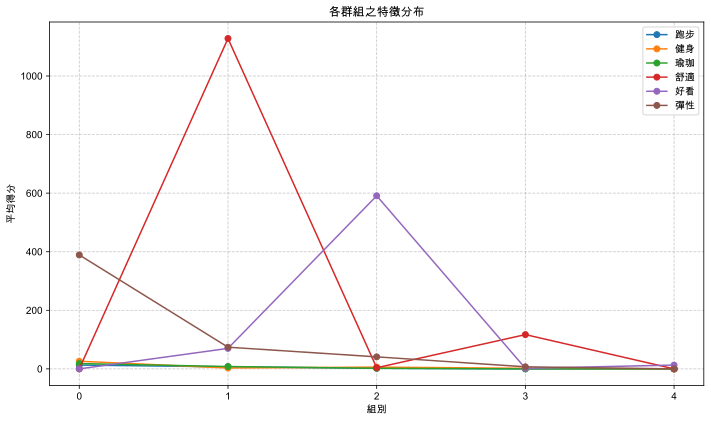

In [9]:
# Calculate sum feature scores for each cluster
keyword_counts = df_clustered.groupby('組別')[features].sum()

# Transpose the data so features become lines and clusters become x-axis
keyword_counts_T = keyword_counts.T

plt.figure(figsize=(10, 6))

# Set x-ticks to be integers only
x_ticks = range(len(keyword_counts_T.columns))

for feature in features:
    plt.plot(x_ticks, keyword_counts_T.loc[feature], marker='o', label=feature)

plt.xticks(x_ticks, keyword_counts_T.columns.astype(int))
plt.title('各群組之特徵分布')
plt.xlabel('組別')
plt.ylabel('平均得分')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 問題 2

請匯入 `蝦皮_運動內衣_教學用【處理後】留言資料100.csv`，根據商品規格，計算各 `colors = ["黑色", "深灰色", "綠色", "裸美膚"]` 在各 `sizes = ["M", "S", "L", "XL", "XXL"]` 的次數。並

1. 存成 "蝦皮市場SKU統計表.csv"
2. 繪製圖表，X 軸為顏色，Y 軸為尺寸數量，圖中需有數值標籤。

In [10]:
df_q2 = pd.read_csv("homework-dataset/蝦皮_運動內衣_教學用【處理後】留言資料100clear.csv")

df_q2.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,商品ID,賣家ID,商品名稱,價格,使用者ID,留言時間,訂單編號,給星,留言內容,商品規格clear
0,0,0,0,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,55835694,1579772984,3.250670e+13,5,NaN,"['黑色', 'M', '黑色', 'S']"
1,1,1,1,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,15225338,1578451631,3.133020e+13,5,NaN,"['黑色', 'M', '黑色', 'S']"
2,2,2,2,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,83903354,1577800151,3.084430e+13,5,NaN,"['綠色', 'S', '深灰色', 'S', '黑色', 'S']"
3,3,3,3,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,187180351,1577497981,3.063300e+13,4,NaN,"['深灰色', 'M']"
4,4,4,4,596068568,20120410,Under Armour UA 安德瑪 瑜伽 含杯墊 女子運動跑步速幹健身 限時特價,299,40249443,1576938301,2.343023e+09,5,NaN,"['黑色', 'XXL']"


### 顏色與尺寸關鍵字標記

In [11]:
colors = ["黑色", "深灰色", "綠色", "裸美膚"]
sizes = ["M", "S", "L", "XL", "XXL"]

df_q2_sku = df_q2.copy()

# 計算「關鍵字」欄位中，不同顏色的計數
for color in colors:
    df_q2_sku[color] = df_q2_sku['商品規格clear'].str.contains(color).astype(int)

# 計算「關鍵字」欄位中，不同尺寸的計數
for size in sizes:
    df_q2_sku[size] = df_q2_sku['商品規格clear'].str.contains(size).astype(int)

df_q2_sku[[*colors, *sizes]]

,黑色,深灰色,綠色,裸美膚,M,S,L,XL,XXL
0,1,0,0,0,1,1,0,0,0
1,1,0,0,0,1,1,0,0,0
2,1,1,1,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,1,0,0,0
96,0,0,0,0,0,0,1,1,0
97,0,0,0,0,0,1,0,0,0
98,0,0,0,1,0,0,1,0,0


### 建立完整 SKU 需求統計表

In [12]:
sku_stats = pd.DataFrame()

for color in colors:
    size_stats = df_q2_sku[df_q2_sku[color] == 1][sizes].sum()
    sku_stats = pd.concat([sku_stats, pd.DataFrame(size_stats).T])

sku_stats.index = colors
sku_stats


,M,S,L,XL,XXL
黑色,13,10,11,7,3
深灰色,4,3,5,3,1
綠色,4,2,4,1,1
裸美膚,8,4,19,11,0


In [13]:
# 輸出檔案
sku_stats.to_csv("蝦皮市場SKU統計表.csv")

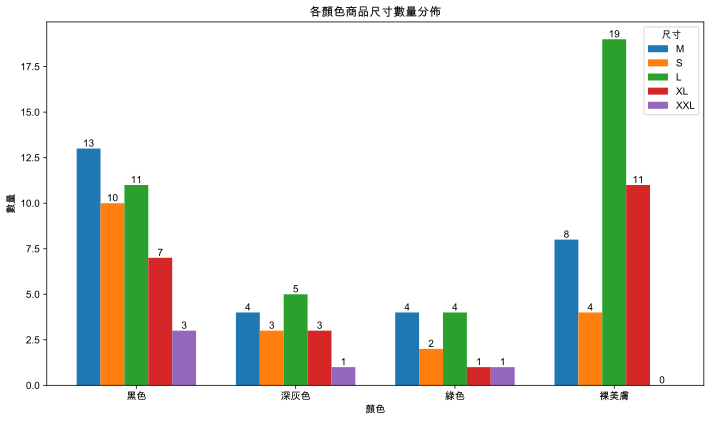

In [14]:
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(10, 6))

bar_width = 0.15
x = range(len(colors))

for i, size in enumerate(sizes):
    values = sku_stats[size]
    bars = plt.bar([xi + i * bar_width for xi in x], values,
                   bar_width, label=size)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar_width / 2, height,
                 f'{int(height)}',
                 ha='center', va='bottom')

plt.xticks([xi + bar_width * 2 for xi in x], colors)
plt.title('各顏色商品尺寸數量分佈')
plt.xlabel('顏色')
plt.ylabel('數量')
plt.legend(title='尺寸')
plt.tight_layout()
plt.show()
